In [12]:
import os
import glob
import sys
import subprocess
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import mmdet3d

SAMPLE_IMG = './sample/vlcsnap-2022-08-17-23h05m09s384.png'
SAMPLE_ANN = './sample/sample.json'
MODEL_CONF = '/mmdetection3d/configs/fcos3d/fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_finetune.py'
MODEL_CKPT = './checkpoints/fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_finetune_20210717_095645-8d806dc2.pth'
OUTPUT_DIR = './output'

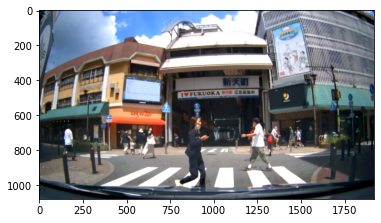

In [2]:
plt.imshow(plt.imread(SAMPLE_IMG))

In [3]:
from mmdet3d.apis import (inference_mono_3d_detector, init_model, show_result_meshlab)

In [4]:
model = init_model(MODEL_CONF, MODEL_CKPT, device='cuda:0')

load checkpoint from local path: ./checkpoints/fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_finetune_20210717_095645-8d806dc2.pth


In [5]:
result, data = inference_mono_3d_detector(model, SAMPLE_IMG, SAMPLE_ANN)

/opt/conda/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
show_result_meshlab(data, result, OUTPUT_DIR, 0.15, show=False, snapshot=True, task='mono-det')

('./output', 'vlcsnap-2022-08-17-23h05m09s384')

In [15]:
output_name = os.path.splitext(os.path.basename(SAMPLE_IMG))[0]
output_src = output_name + '_img.png'
output_dst = output_name + '_pred.png'

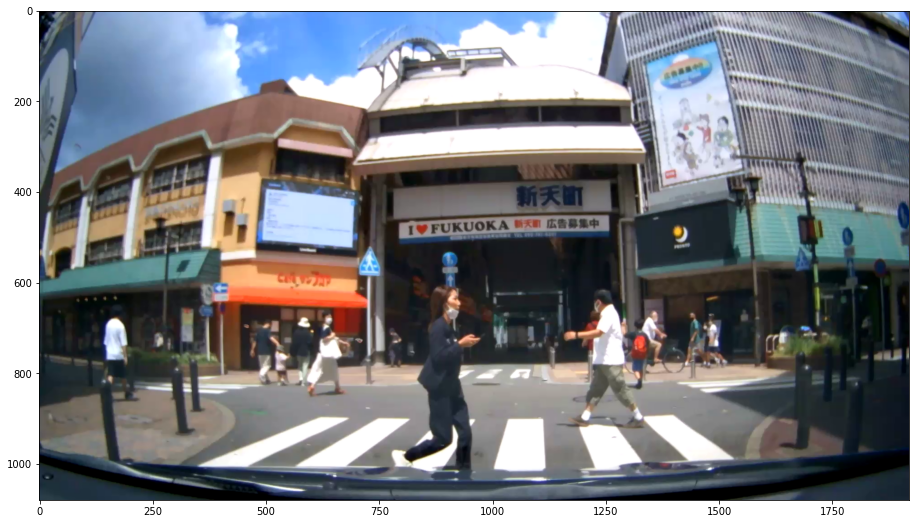

In [19]:
plt.figure(figsize=(16,9))
plt.imshow(plt.imread(os.path.join(OUTPUT_DIR, output_name, output_src)))

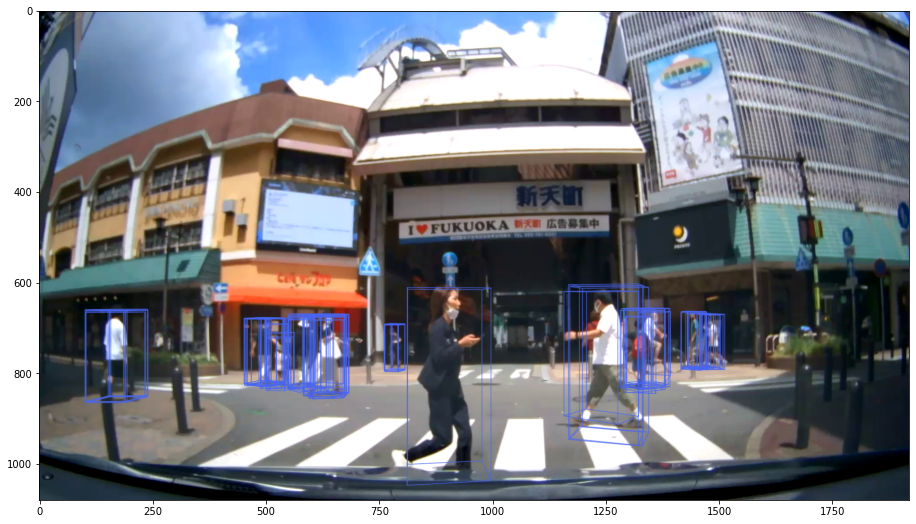

In [20]:
plt.figure(figsize=(16,9))
plt.imshow(plt.imread(os.path.join(OUTPUT_DIR, output_name, output_dst)))